In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.csv to online_retail_II.csv


In [ ]:
df = pd.read_csv("online_retail_II.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1067371.00,1067371,1067371.00,824364.00
mean,9.94,2011-01-02 21:13:55.394028544,4.65,15324.64
min,-80995.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-07-09 09:46:00,1.25,13975.00
50%,3.00,2010-12-07 15:28:00,2.10,15255.00
75%,10.00,2011-07-22 10:23:00,4.15,16797.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,172.71,NaN,123.55,1697.46


# negative entry in Quatity and Price column is unusual

In [ ]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [ ]:
df['Customer ID'].isna().sum()

np.int64(243007)

# total there are 243007 missing rows in Customer ID column

In [ ]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [ ]:
(df["Quantity"] < 0).sum(), (df["Price"] < 0).sum()

(np.int64(22950), np.int64(5))

# total there are 22950 and 5 rows where quantity and Price are negatives

In [ ]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [ ]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

# in Invoice column we have some entries Satrting with A(3 rows) and C(19500 rows) also where C stands for cancellation

In [ ]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [ ]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062295,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
1062715,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
1064829,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
1066369,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [ ]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


### Notes

#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | C3              | Not sure, only 1 transaction                                           | Exclude                 |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | TESTXXX         | Testing data, not valid                                                | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now|
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | ADJUSTX         | Looks like manual account adjustments by admins                        | Exclude for now         |

## Data Cleaning

In [ ]:
cleaned_df = df.copy()

# ist column to be cleaned is Invoice
# i will keep only invoice with  6 digit number

In [ ]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


# then i cleaned StockCode column

In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)                   # include 5 digit number
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)        # include 5 digit number with letters
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)                   # include 5 digit number with PADS
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


# dropping the customers whose Customer ID is null

In [ ]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

/tmp/ipython-input-1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802711.00,802711,802711.00,802711.00
mean,13.34,2011-01-02 09:20:34.073732864,2.93,15338.07
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-07 11:53:00,1.25,13988.00
50%,5.00,2010-12-03 14:54:00,1.95,15276.00
75%,12.00,2011-07-28 13:02:00,3.75,16809.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,144.54,NaN,4.28,1693.93


# dropping Null customers from Customer ID has resolved problem of negative entry in Quantity & Price column

In [ ]:
len(cleaned_df[cleaned_df["Price"] == 0])

62

In [ ]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802649.00,802649,802649.00,802649.00
mean,13.32,2011-01-02 09:19:54.210121984,2.93,15338.15
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-07 11:53:00,1.25,13988.00
50%,5.00,2010-12-03 14:54:00,1.95,15276.00
75%,12.00,2011-07-28 13:02:00,3.75,16809.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,143.87,NaN,4.28,1693.90


In [ ]:
cleaned_df["Price"].min()

0.001

In [ ]:
len(cleaned_df)/len(df)

0.7519868911559336

# Dropped about 25% of records during cleaning

## How Does KMeans Clustering Work?

![image.png](attachment:image.png)

# Feature Engineering

# SalesLineTotal = Qunatity * Price

In [ ]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

/tmp/ipython-input-2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


# there are many invoice number for the same customer Id which means that there are many purchase items for that customer on a single Invoice/Bill

# like for customer 12346 we have 3 frequency means total bill was 77352.96 for 3 items
# for customer 12347 we have 8 frequency means total bill was 5633.32 for 8 items

In [ ]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5633.32,8,2011-12-07 15:52:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00
5,12351.00,300.93,1,2010-11-29 15:23:00
6,12352.00,1729.54,9,2011-11-03 14:37:00
7,12353.00,406.76,2,2011-05-19 17:47:00
8,12354.00,1079.40,1,2011-04-21 13:11:00
9,12355.00,947.61,2,2011-05-09 13:49:00


In [ ]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,325
1,12347.00,5633.32,8,2011-12-07 15:52:00,1
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


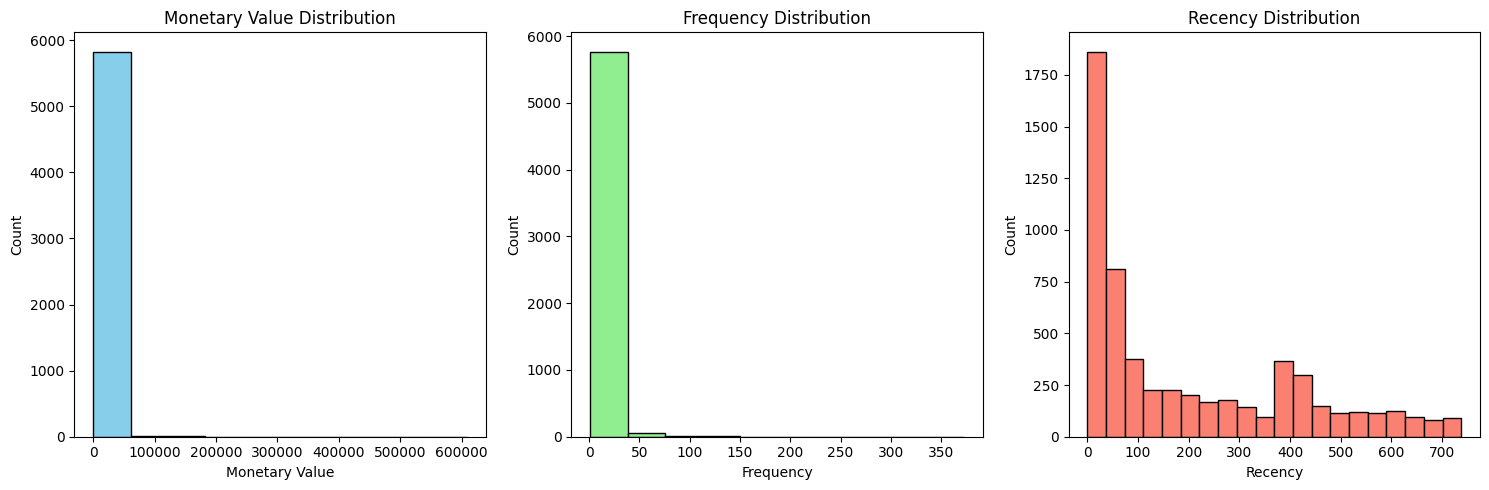

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

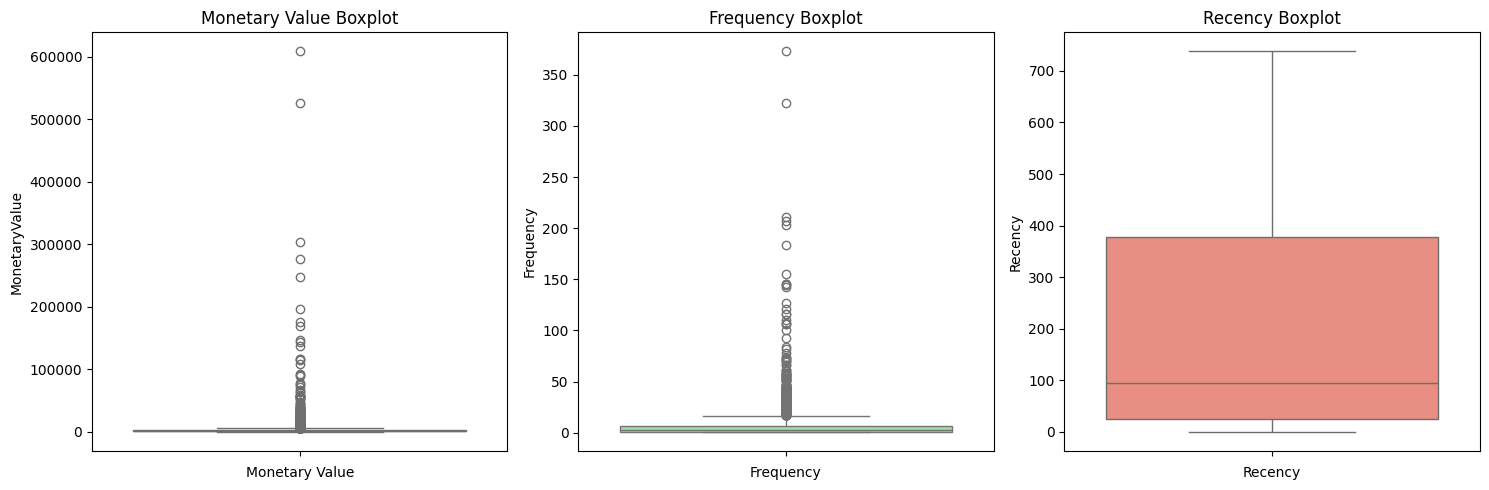

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

## here if we analyse carefully we have extreme outliers in Monetary Value(i.e. list of customers which spends lot of money for purchase) and Frequency(i.e. list of customers for whom frequency of vising and busying to store is more frequent). hence we cant just remove them from our data instead we seperate out them & analyse them differently.

# Creating new dataframe for outliers of Monetary Value and Frequency

In [ ]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.00,620.00,620.00,620,620.00
mean,15077.78,18260.64,25.98,2011-10-19 01:33:52.548387072,50.98
min,12346.00,5217.44,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,6591.86,12.00,2011-10-23 01:02:00,4.00
50%,14924.00,9131.81,18.00,2011-11-23 12:34:30,16.00
75%,16607.50,14486.35,29.00,2011-12-05 10:27:30,47.25
max,18260.00,608821.65,373.00,2011-12-09 12:49:00,691.00
std,1754.42,41750.24,31.13,NaN,102.87


## We have 620 outliers in MonetaryValue Column

In [ ]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21143.85,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6368.09,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9760.71,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16691.30,35.00,2011-12-06 12:59:15,24.00
max,18283.00,608821.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49369.50,34.68,NaN,70.63


We have 424 outliers in Frequency Column

In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.00,5167.00,5167.00,5167,5167.00
mean,15341.72,1133.52,3.69,2011-05-04 02:42:25.140313600,218.90
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13862.50,311.03,1.00,2010-11-11 13:06:30,32.00
50%,15355.00,717.51,3.00,2011-07-28 14:08:00,133.00
75%,16811.50,1579.13,5.00,2011-11-06 13:22:30,392.00
max,18287.00,5202.97,16.00,2011-12-09 12:50:00,738.00
std,1705.11,1128.97,3.19,NaN,211.12


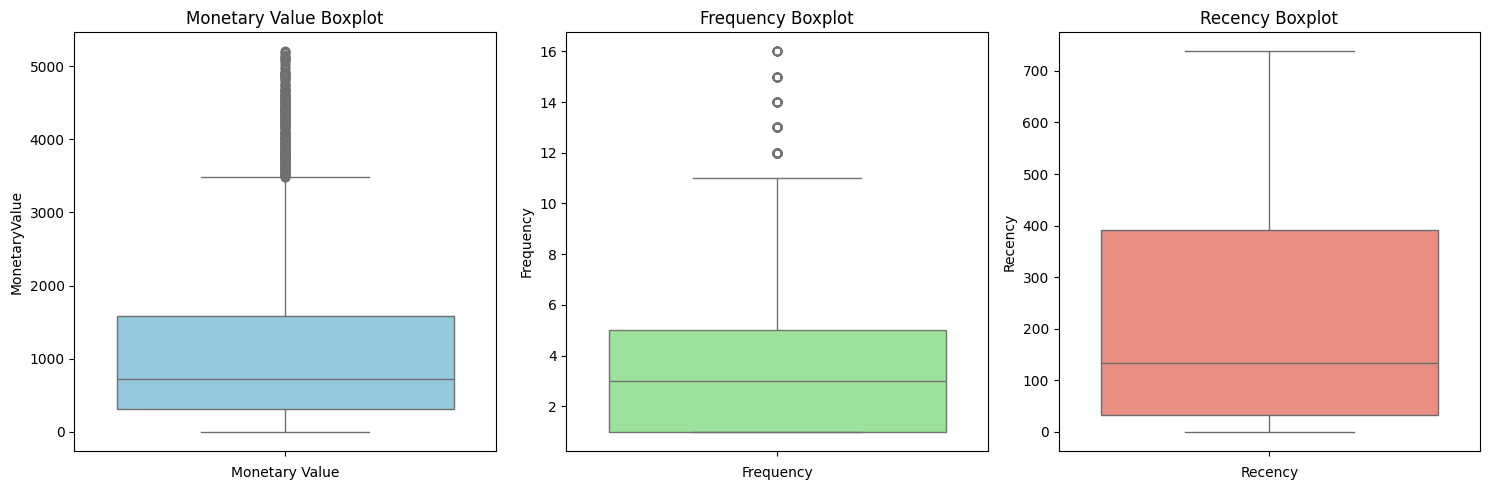

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

## if we analyse this Boxplot with with previous we still have outliers a bit but distribution of data is more balanced here.

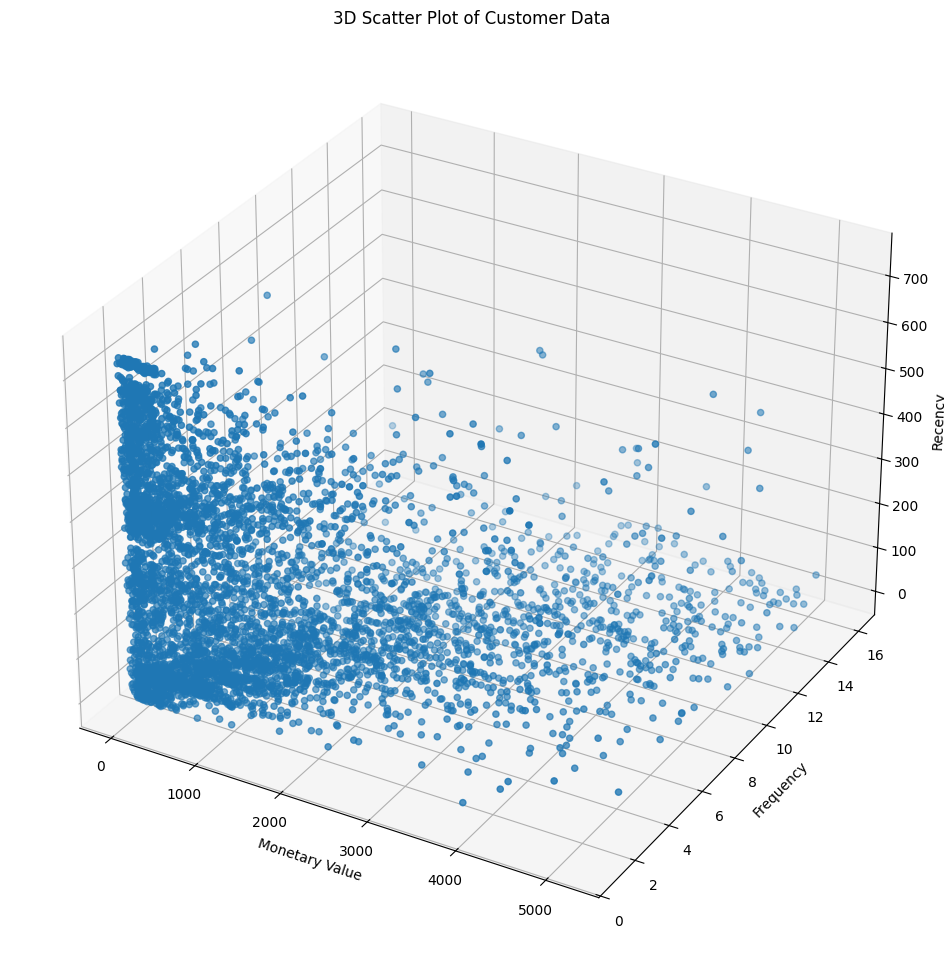

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.46,0.41,-0.69
3,2.25,-0.22,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.66,-0.87
...,...,...,...
5846,-0.85,-0.53,-1.00
5848,-0.64,-0.84,1.00
5849,-0.67,-0.84,2.09
5850,0.10,-0.53,1.22


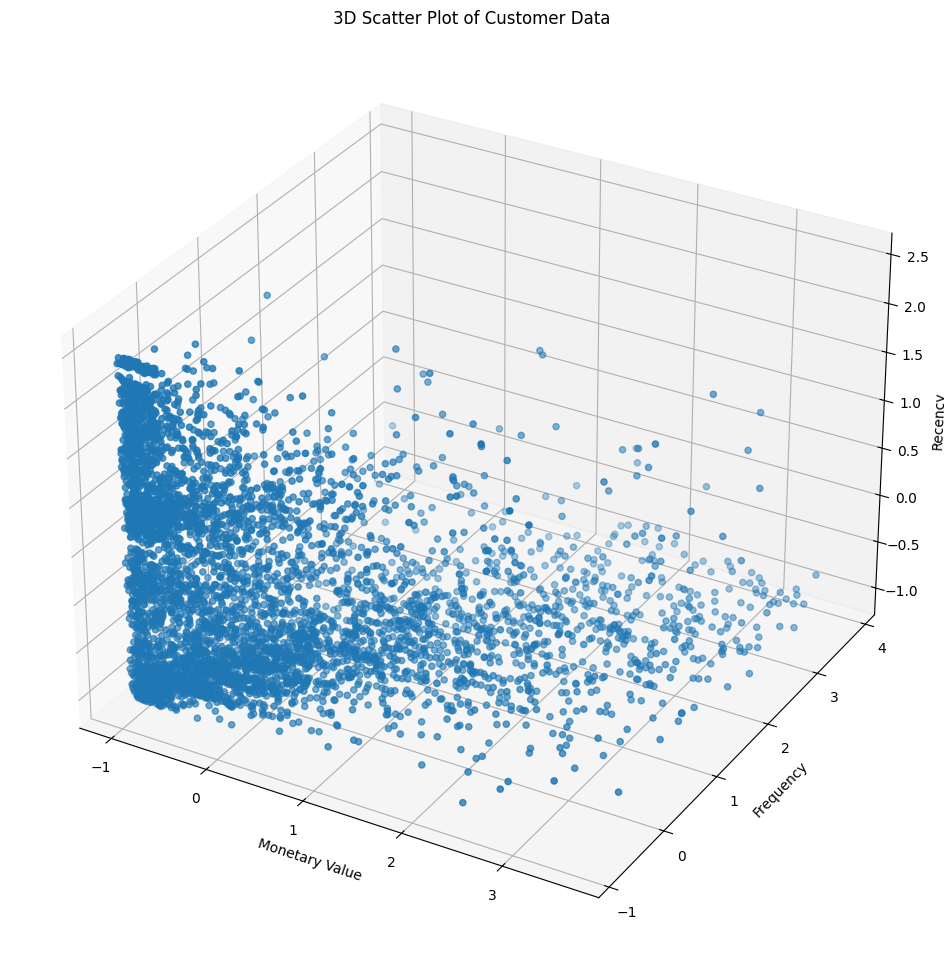

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

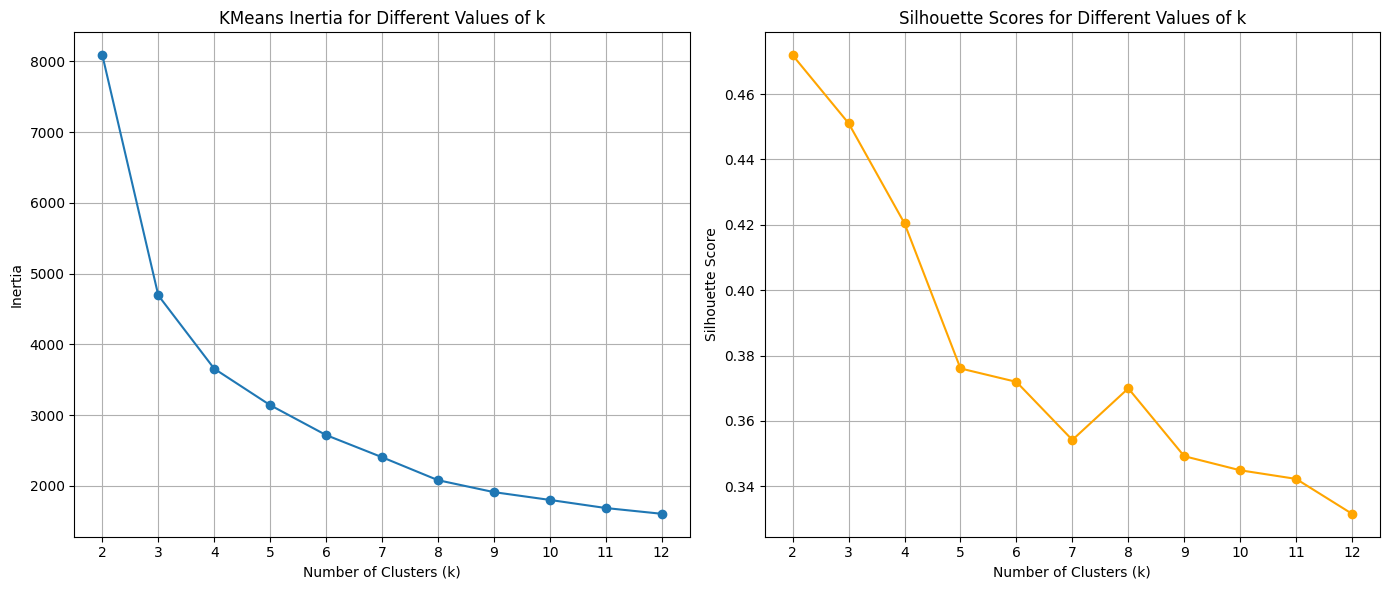

In [ ]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

# no of clusters from elbow method is 4 or 5 but silhouette score drop significantly from 4 to 5 clusters . and we neewant more silhouette score and less no of clusters for better KMeans model

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

#  silhoutte score  = 0.4204204476415782

In [ ]:
#  silhoutte score  = 0.4204204476415782
silhoutte_scores

[np.float64(0.471871382658571),
 np.float64(0.4510651225137391),
 np.float64(0.4204204476415782),
 np.float64(0.3760569671139445),
 np.float64(0.3719493481591762),
 np.float64(0.354195795937586),
 np.float64(0.36996586561149186),
 np.float64(0.3492211478943694),
 np.float64(0.34490957975998365),
 np.float64(0.3422695190531533),
 np.float64(0.3315941389536209)]

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies–Bouldin Index
#dbi = davies_bouldin_score(scaled_data_df, cluster_labels)

# Calinski–Harabasz Index
#chi = calinski_harabasz_score(scaled_data_df, cluster_labels)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([2, 2, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/tmp/ipython-input-3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5846,18282.00,178.05,2,2011-12-02 11:43:00,7,3
5848,18284.00,411.68,1,2010-10-04 11:33:00,431,1
5849,18285.00,377.00,1,2010-02-17 10:24:00,660,1
5850,18286.00,1246.43,2,2010-08-20 11:57:00,476,1


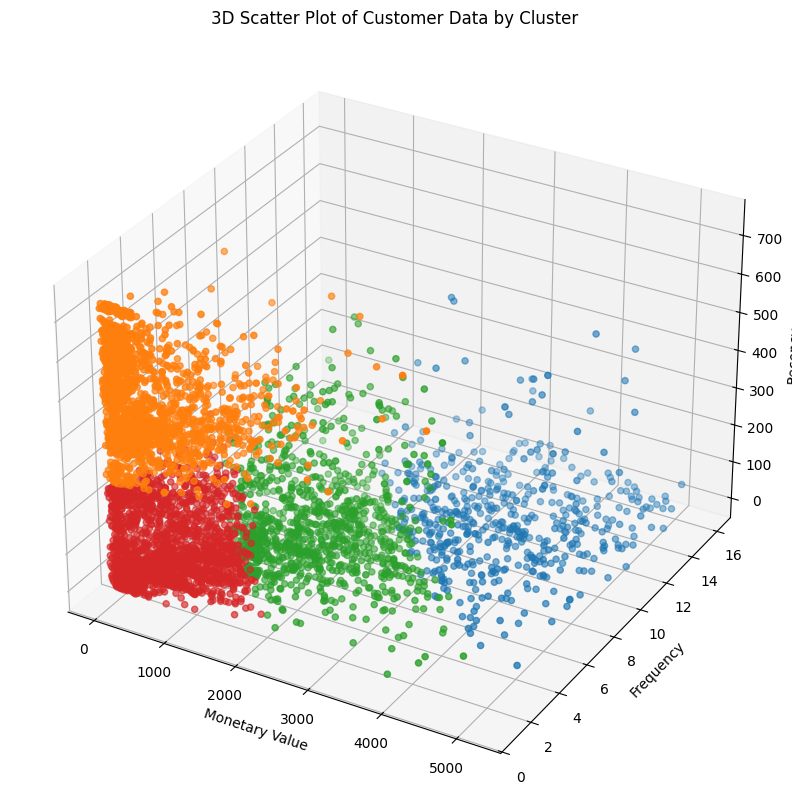

In [ ]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

# violon plot is combination of boxplot (in center vertical line) and frequency distribution curve (smoothed histogram)

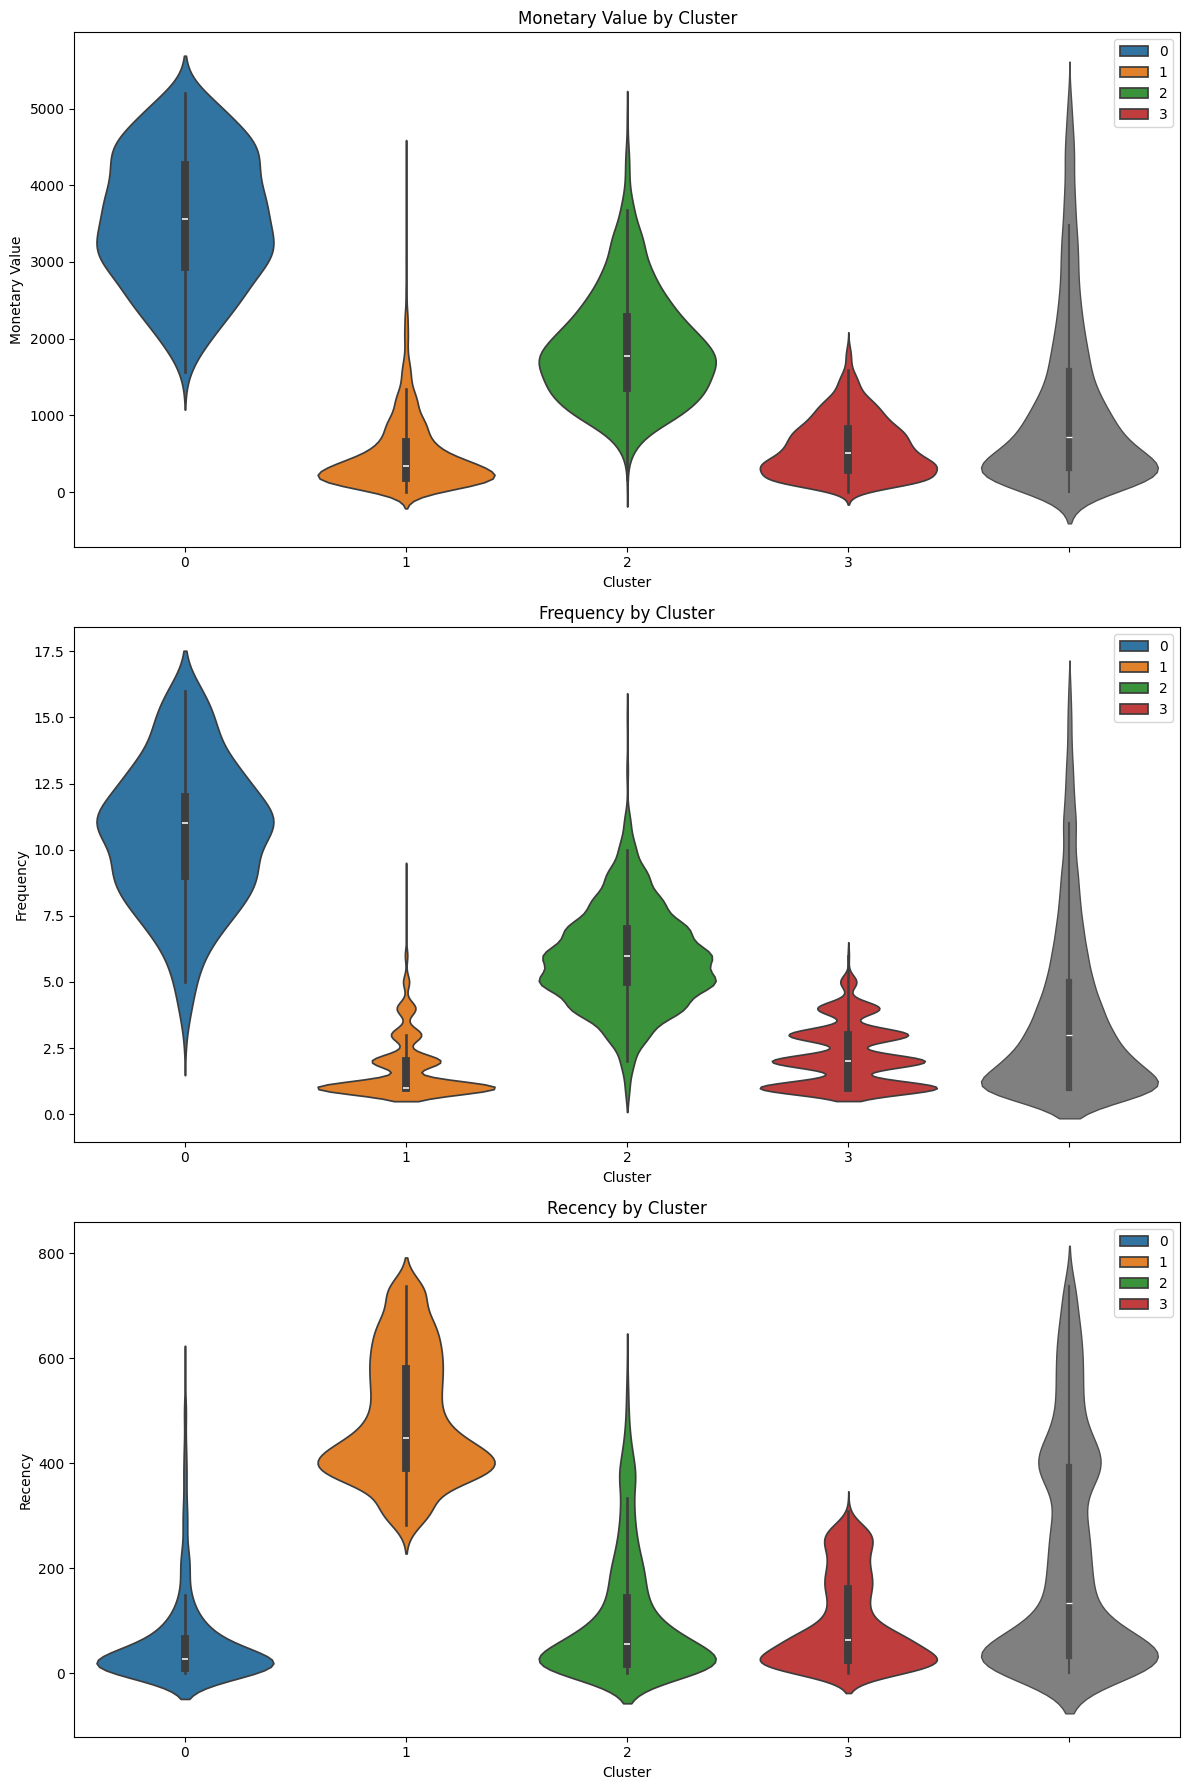

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

# till above we analysed non outliers data

# now we will analyse outliers data because they are also usefull because they are the ones having more monetary value, more recency and high frequncy

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.00,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


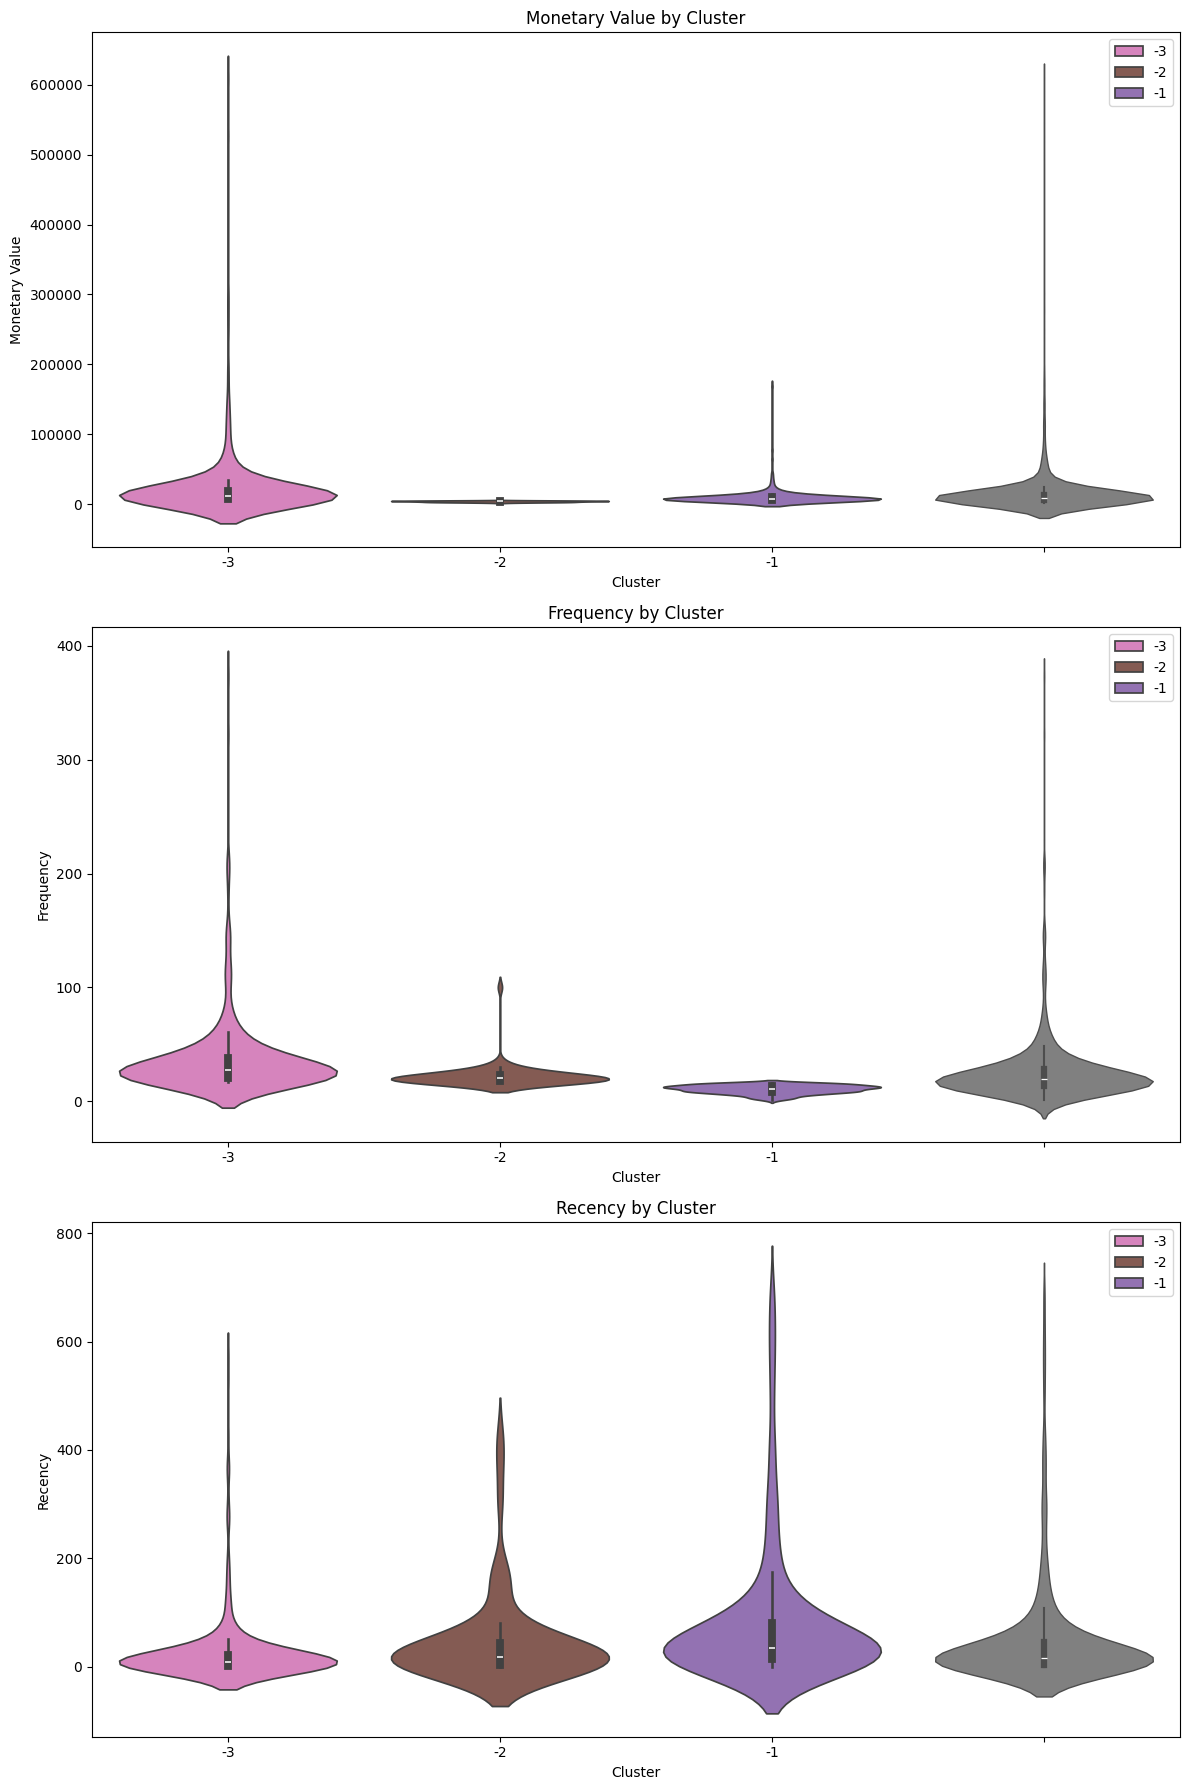

In [ ]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [ ]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [ ]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


In [ ]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2,NURTURE
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2,NURTURE
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1,RE-ENGAGE
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2,NURTURE
...,...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3,DELIGHT
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3,DELIGHT
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3,DELIGHT
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3,DELIGHT


## Visualisation

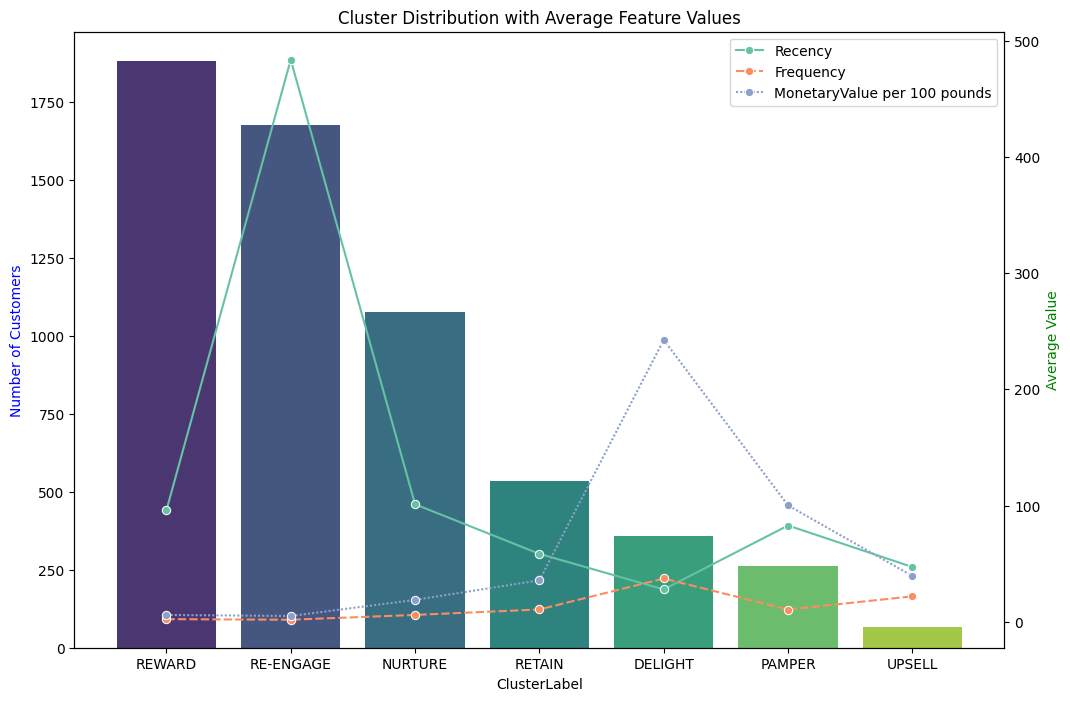

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You can change linkage to 'average', 'complete', etc.
labels_agg = agg.fit_predict(scaled_data_df)